In [1]:
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container { width: 95%;} div#menubar-container { width: 85%; } div#maintoolbar-container { width: 99%; } </style> """))


get_ipython().magic('pylab inline')
import pandas as pd
import numpy as np
import os


pd.set_option('display.max_rows', 150)    

TodasEstaciones = pd.read_csv(os.path.join(".", "Data", 'trainstreamtest.csv'),index_col=0,parse_dates=True)
TodasEstaciones.head()

Populating the interactive namespace from numpy and matplotlib


,Leone,Nuuuli,Afono
Date,,,
2017-04-18,2.907238,5.601045,0.779264
2017-04-19,2.924141,5.910791,0.780632
2017-04-20,2.928016,6.426429,0.783693
2017-04-21,3.469744,5.906841,0.849937
2017-04-22,2.629277,6.606846,0.723030


(array([17274, 17287, 17318, 17348, 17379, 17410, 17440, 17471, 17501,
        17532, 17563, 17567], dtype=int64),
 <a list of 12 Text xticklabel objects>)

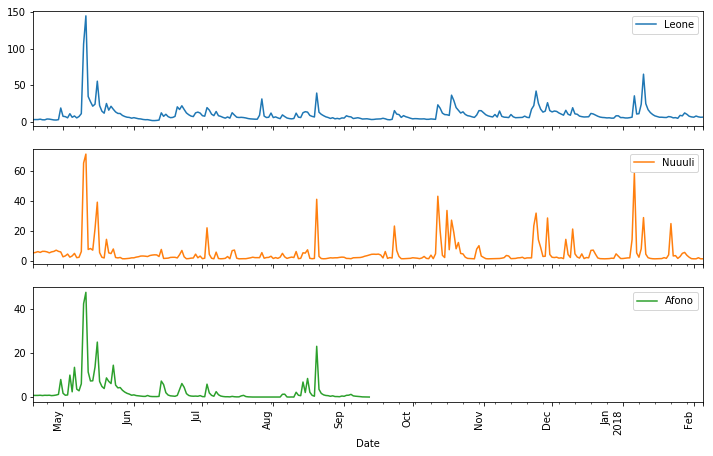

In [2]:
TodasEstaciones.plot(subplots=True, figsize=(12, 8)); plt.legend(loc='best')
xticks(rotation='vertical')

In [3]:
import datetime
#we create a date column to extract the week number
TodasEstaciones['Date']=TodasEstaciones.index
#apply a lambda function to the whole panda dataframe column
TodasEstaciones['week'] = TodasEstaciones['Date'].apply(lambda x: x.isocalendar()[1])
#drop the date column because we dont need it
del TodasEstaciones['Date']
#let see our dataframe
TodasEstaciones.head()



,Leone,Nuuuli,Afono,week
Date,,,,
2017-04-18,2.907238,5.601045,0.779264,16
2017-04-19,2.924141,5.910791,0.780632,16
2017-04-20,2.928016,6.426429,0.783693,16
2017-04-21,3.469744,5.906841,0.849937,16
2017-04-22,2.629277,6.606846,0.723030,16


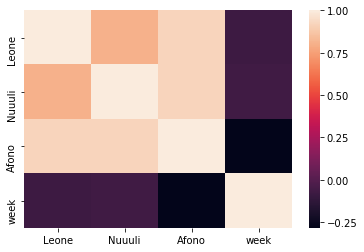

In [4]:
#creation of a correlation plot with seaborn
import seaborn as sns
corr = TodasEstaciones.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# shows that afono is equally related to Leone and Nuuuli

In [5]:
#Definition of training sets
X_train = TodasEstaciones.loc['2017-04-18':'2017-09-12',['Nuuuli','Leone','week']].astype(float32).values#,'week']] # Est 1, 3 and #week
y_train = TodasEstaciones.loc['2017-04-18':'2017-09-12','Afono'].astype(float32).values # Est 2

In [6]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

In [7]:
X_train[:20]

array([[ 0.04998467, -0.4827046 , -1.672059  ],
       [ 0.08436266, -0.4816221 , -1.672059  ],
       [ 0.14159209, -0.4813739 , -1.672059  ],
       [ 0.08392424, -0.44667903, -1.672059  ],
       [ 0.16161613, -0.50050664, -1.672059  ],
       [ 0.15973759, -0.50664175, -1.672059  ],
       [ 0.12401906, -0.43127555, -1.5083919 ],
       [ 0.05168175, -0.44221884, -1.5083919 ],
       [ 0.12333821, -0.47909972, -1.5083919 ],
       [ 0.1581834 , -0.5147475 , -1.5083919 ],
       [ 0.24803479, -0.5223468 , -1.5083919 ],
       [ 0.16078022, -0.48952734, -1.5083919 ],
       [ 0.11580552,  0.53417534, -1.5083919 ],
       [-0.24241069, -0.19539258, -1.3447247 ],
       [-0.1734628 , -0.22379123, -1.3447247 ],
       [-0.03876078, -0.32909238, -1.3447247 ],
       [-0.26812696,  0.03232237, -1.3447247 ],
       [-0.17734787, -0.2802736 , -1.3447247 ],
       [ 0.01017129, -0.16677518, -1.3447247 ],
       [-0.30461755, -0.33536074, -1.3447247 ]], dtype=float32)

In [8]:
from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(Dense(50, activation='linear', input_shape=(3,)))
model.add(Dense(80, activation='linear'))
model.add(Dense(1, activation='linear'))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 80)                4080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 81        
Total params: 4,361
Trainable params: 4,361
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='mean_squared_error',  optimizer='Nadam',  metrics=['accuracy'])
model.fit(X_train, y_train,epochs=600,verbose=1)


Epoch 1/600
148/148 [==============================] - 0s 1ms/step - loss: 4.3081 - acc: 0.0000e+00
Epoch 2/600
148/148 [==============================] - 0s 44us/step - loss: 4.0093 - acc: 0.0000e+00
Epoch 3/600
148/148 [==============================] - 0s 44us/step - loss: 4.0370 - acc: 0.0000e+00
Epoch 4/600
148/148 [==============================] - 0s 77us/step - loss: 4.0440 - acc: 0.0000e+00
Epoch 5/600
148/148 [==============================] - 0s 47us/step - loss: 4.1466 - acc: 0.0000e+00
Epoch 6/600
148/148 [==============================] - 0s 40us/step - loss: 4.2285 - acc: 0.0000e+00
Epoch 7/600
148/148 [==============================] - 0s 74us/step - loss: 4.1717 - acc: 0.0000e+00
Epoch 8/600
148/148 [==============================] - 0s 54us/step - loss: 4.0290 - acc: 0.0000e+00
Epoch 9/600
148/148 [==============================] - 0s 54us/step - loss: 4.0613 - acc: 0.0000e+00
Epoch 10/600
148/148 [==============================] - 0s 67us/step - loss: 4.1448 - acc: 0

148/148 [==============================] - 0s 60us/step - loss: 4.0485 - acc: 0.0000e+00
Epoch 82/600
148/148 [==============================] - 0s 64us/step - loss: 4.2143 - acc: 0.0000e+00
Epoch 83/600
148/148 [==============================] - 0s 67us/step - loss: 4.0796 - acc: 0.0000e+00
Epoch 84/600
148/148 [==============================] - 0s 40us/step - loss: 4.0784 - acc: 0.0000e+00
Epoch 85/600
148/148 [==============================] - 0s 60us/step - loss: 4.1079 - acc: 0.0000e+00
Epoch 86/600
148/148 [==============================] - 0s 44us/step - loss: 4.0459 - acc: 0.0000e+00
Epoch 87/600
148/148 [==============================] - 0s 67us/step - loss: 4.0530 - acc: 0.0000e+00
Epoch 88/600
148/148 [==============================] - 0s 57us/step - loss: 4.0148 - acc: 0.0000e+00
Epoch 89/600
148/148 [==============================] - 0s 37us/step - loss: 3.9986 - acc: 0.0000e+00
Epoch 90/600
148/148 [==============================] - 0s 40us/step - loss: 4.0474 - acc: 0.00

148/148 [==============================] - 0s 50us/step - loss: 4.0626 - acc: 0.0000e+00
Epoch 161/600
148/148 [==============================] - 0s 60us/step - loss: 4.0270 - acc: 0.0000e+00
Epoch 162/600
148/148 [==============================] - 0s 40us/step - loss: 4.0726 - acc: 0.0000e+00
Epoch 163/600
148/148 [==============================] - 0s 40us/step - loss: 4.0999 - acc: 0.0000e+00
Epoch 164/600
148/148 [==============================] - 0s 67us/step - loss: 4.0407 - acc: 0.0000e+00
Epoch 165/600
148/148 [==============================] - 0s 54us/step - loss: 4.0982 - acc: 0.0000e+00
Epoch 166/600
148/148 [==============================] - 0s 37us/step - loss: 4.0435 - acc: 0.0000e+00
Epoch 167/600
148/148 [==============================] - 0s 47us/step - loss: 4.0326 - acc: 0.0000e+00
Epoch 168/600
148/148 [==============================] - 0s 67us/step - loss: 4.0461 - acc: 0.0000e+00
Epoch 169/600
148/148 [==============================] - 0s 94us/step - loss: 4.0176 - 

148/148 [==============================] - 0s 54us/step - loss: 4.1032 - acc: 0.0000e+00
Epoch 240/600
148/148 [==============================] - 0s 47us/step - loss: 4.0154 - acc: 0.0000e+00
Epoch 241/600
148/148 [==============================] - 0s 60us/step - loss: 4.0121 - acc: 0.0000e+00
Epoch 242/600
148/148 [==============================] - 0s 37us/step - loss: 4.0463 - acc: 0.0000e+00
Epoch 243/600
148/148 [==============================] - 0s 40us/step - loss: 4.0324 - acc: 0.0000e+00
Epoch 244/600
148/148 [==============================] - 0s 50us/step - loss: 3.9804 - acc: 0.0000e+00
Epoch 245/600
148/148 [==============================] - 0s 80us/step - loss: 4.0273 - acc: 0.0000e+00
Epoch 246/600
148/148 [==============================] - 0s 47us/step - loss: 4.0398 - acc: 0.0000e+00
Epoch 247/600
148/148 [==============================] - 0s 44us/step - loss: 4.0843 - acc: 0.0000e+00
Epoch 248/600
148/148 [==============================] - 0s 47us/step - loss: 4.0218 - 

148/148 [==============================] - 0s 44us/step - loss: 4.1469 - acc: 0.0000e+00
Epoch 319/600
148/148 [==============================] - 0s 47us/step - loss: 4.0544 - acc: 0.0000e+00
Epoch 320/600
148/148 [==============================] - 0s 87us/step - loss: 4.0527 - acc: 0.0000e+00
Epoch 321/600
148/148 [==============================] - 0s 47us/step - loss: 4.0451 - acc: 0.0000e+00
Epoch 322/600
148/148 [==============================] - 0s 50us/step - loss: 4.0834 - acc: 0.0000e+00
Epoch 323/600
148/148 [==============================] - 0s 44us/step - loss: 4.1258 - acc: 0.0000e+00
Epoch 324/600
148/148 [==============================] - 0s 94us/step - loss: 4.0466 - acc: 0.0000e+00
Epoch 325/600
148/148 [==============================] - 0s 44us/step - loss: 3.9821 - acc: 0.0000e+00
Epoch 326/600
148/148 [==============================] - 0s 50us/step - loss: 4.0309 - acc: 0.0000e+00
Epoch 327/600
148/148 [==============================] - 0s 47us/step - loss: 4.0015 - 

148/148 [==============================] - 0s 37us/step - loss: 4.0629 - acc: 0.0000e+00
Epoch 398/600
148/148 [==============================] - 0s 40us/step - loss: 4.0093 - acc: 0.0000e+00
Epoch 399/600
148/148 [==============================] - 0s 40us/step - loss: 4.0197 - acc: 0.0000e+00
Epoch 400/600
148/148 [==============================] - 0s 74us/step - loss: 4.0038 - acc: 0.0000e+00
Epoch 401/600
148/148 [==============================] - 0s 37us/step - loss: 3.9908 - acc: 0.0000e+00
Epoch 402/600
148/148 [==============================] - 0s 44us/step - loss: 4.0975 - acc: 0.0000e+00
Epoch 403/600
148/148 [==============================] - 0s 37us/step - loss: 4.0237 - acc: 0.0000e+00
Epoch 404/600
148/148 [==============================] - 0s 50us/step - loss: 3.9993 - acc: 0.0000e+00
Epoch 405/600
148/148 [==============================] - 0s 57us/step - loss: 4.0152 - acc: 0.0000e+00
Epoch 406/600
148/148 [==============================] - 0s 47us/step - loss: 4.0182 - 

148/148 [==============================] - 0s 47us/step - loss: 4.0837 - acc: 0.0000e+00
Epoch 477/600
148/148 [==============================] - 0s 44us/step - loss: 4.0141 - acc: 0.0000e+00
Epoch 478/600
148/148 [==============================] - 0s 44us/step - loss: 4.0178 - acc: 0.0000e+00
Epoch 479/600
148/148 [==============================] - 0s 70us/step - loss: 4.1044 - acc: 0.0000e+00
Epoch 480/600
148/148 [==============================] - 0s 44us/step - loss: 4.0509 - acc: 0.0000e+00
Epoch 481/600
148/148 [==============================] - 0s 40us/step - loss: 4.0585 - acc: 0.0000e+00
Epoch 482/600
148/148 [==============================] - 0s 47us/step - loss: 4.0103 - acc: 0.0000e+00
Epoch 483/600
148/148 [==============================] - 0s 77us/step - loss: 4.0417 - acc: 0.0000e+00
Epoch 484/600
148/148 [==============================] - 0s 50us/step - loss: 4.0291 - acc: 0.0000e+00
Epoch 485/600
148/148 [==============================] - 0s 47us/step - loss: 4.0215 - 

148/148 [==============================] - 0s 57us/step - loss: 4.0799 - acc: 0.0000e+00
Epoch 556/600
148/148 [==============================] - 0s 50us/step - loss: 3.9838 - acc: 0.0000e+00
Epoch 557/600
148/148 [==============================] - 0s 47us/step - loss: 4.0048 - acc: 0.0000e+00
Epoch 558/600
148/148 [==============================] - 0s 57us/step - loss: 4.0406 - acc: 0.0000e+00
Epoch 559/600
148/148 [==============================] - 0s 50us/step - loss: 4.0016 - acc: 0.0000e+00
Epoch 560/600
148/148 [==============================] - 0s 44us/step - loss: 3.9807 - acc: 0.0000e+00
Epoch 561/600
148/148 [==============================] - 0s 60us/step - loss: 3.9889 - acc: 0.0000e+00
Epoch 562/600
148/148 [==============================] - 0s 54us/step - loss: 4.0362 - acc: 0.0000e+00
Epoch 563/600
148/148 [==============================] - 0s 57us/step - loss: 4.1320 - acc: 0.0000e+00
Epoch 564/600
148/148 [==============================] - 0s 74us/step - loss: 4.0305 - 

In [15]:
y_pred = model.predict(X_train)
y_pred[:10]

array([[2.4002075],
       [2.4968793],
       [2.6532109],
       [2.5991116],
       [2.6510239],
       [2.627758 ],
       [2.659423 ],
       [2.4303606],
       [2.5160227],
       [2.505251 ]], dtype=float32)

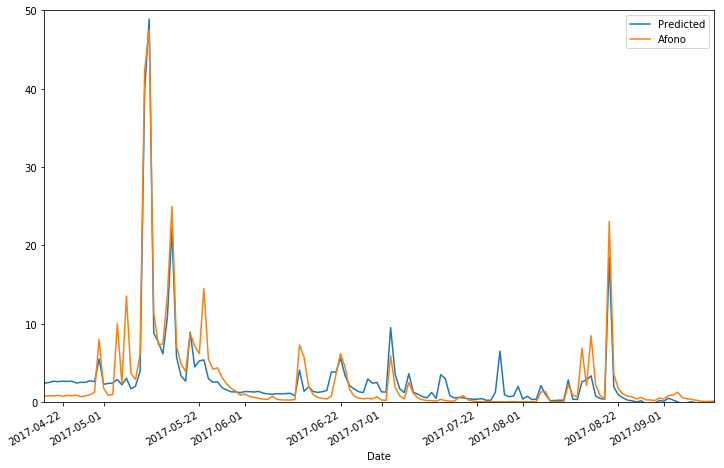

In [16]:
plot(TodasEstaciones.loc['2017-04-18':'2017-09-12'].index,y_pred,label='Predicted')
TodasEstaciones['Afono'].loc['2017-04-18':'2017-09-12'].plot()
figsize(12,8)
ylim(0,50)
legend(loc='best')

In [17]:
#Get the prediction for the train set
X_missing = TodasEstaciones.loc['2017-09-13':'2018-02-05',['Leone','Nuuuli','week']].astype(float32).values

# Define the scaler 
scaler = StandardScaler().fit(X_missing)

# Scale the train set
X_missing = scaler.transform(X_missing)

In [18]:
# create the training set
y_missing = model.predict(X_missing)
y_missing = y_missing.reshape([146 ]).tolist()

C:\Users\WRRCuser\Anaconda3\envs\keras_test\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(array([17274, 17287, 17318, 17348, 17379, 17410, 17440, 17471, 17501,
        17532, 17563, 17567], dtype=int64),
 <a list of 12 Text xticklabel objects>)

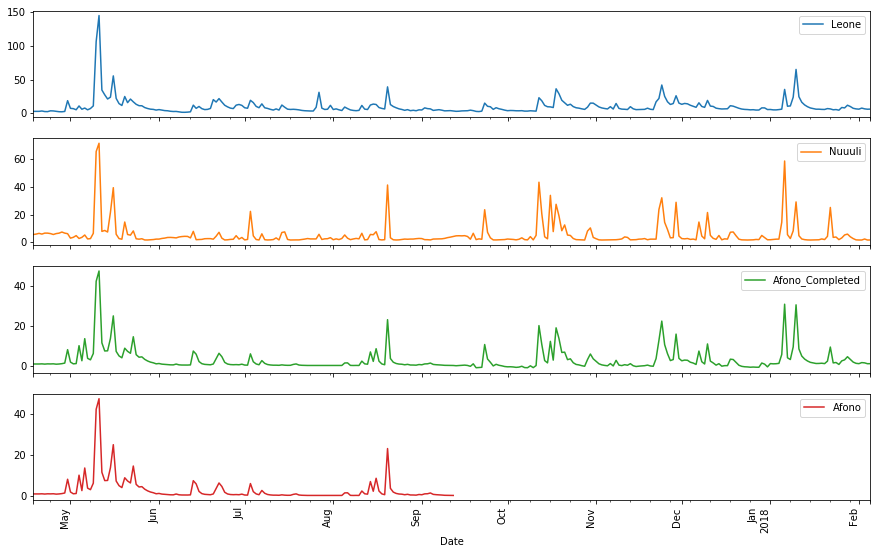

In [19]:
TodasEstaciones['Afono_Completed']=TodasEstaciones['Afono']
TodasEstaciones['Afono_Completed'].loc['2017-09-13':'2018-02-05']=y_missing

TodasEstaciones.loc['2017-04-18':'2018-02-05',['Leone','Nuuuli','Afono_Completed','Afono']].plot(subplots=True, 
                                                   figsize=(15, 10)); plt.legend(loc='best')
xticks(rotation='vertical')


In [20]:
#https://www.hatarilabs.com/ih-en/fill-missing-precipitation-data-with-artificial-intelligence-python-keras-tutorial
    

In [21]:
VerdadEstaciones = pd.read_csv(os.path.join(".", "Data", 'train_streamhole.csv'),index_col=0,parse_dates=True)

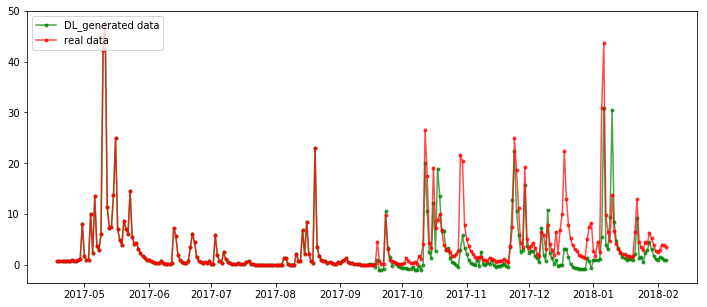

In [23]:
fig = plt.figure(figsize=(12, 5))
ax1 = plt.axes()
#ax1.set_title(i, color='darkblue')
plt.plot(TodasEstaciones.index, TodasEstaciones['Afono_Completed'], alpha = .7, color='g',  marker = '.', label="DL_generated data")
plt.plot(VerdadEstaciones.index, VerdadEstaciones['Afono'], alpha = .7, color='r',  marker = '.', label= "real data")
ax1.legend(loc=2)